# Project 2 report

This comprehensive report aims to conduct a thorough investigation into three crucial aspects of the asthma disease. This report will primarily focus on the cities in Scotland with the highest population, namely Edinburgh, Aberdeen, and Dundee [1]. Reportedly, there has been a surge in respiratory diseases after the COVID-19 pandemic [2]. To analyse the after-effects of COVID-19 on respiratory health, the scope of this report is limited to data from 2019-2022.

Firstly, we will be examining which city, Edinburgh, Aberdeen, and Dundee, has the highest number of asthma patients. This analysis will help us gain valuable insights into the prevalence of asthma in these areas. Additionally, we will conduct an analysis to determine the age group that is most impacted by asthma. Finally, the report will explore the gender-based analysis of asthma prevalence, specifically comparing male and female populations. The goal is to identify any noteworthy variations in asthma disease between genders.


This report will make use of a range of Python libraries, including Pandas, Matplotlib, Seaborn, Numpy, and Plotly express [3].

In [9]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

Throughout our analysis, we will carefully extract and concentrate on data from the disease prevalance dataset that pertains to GP Practice or areas, with a specific focus on Edinburgh, Dundee, and Aberdeen. Additionally, data extraction will be limited to the years 2019 through 2022. Following this, we will utilise the Seaborn library to create a comparison of total asthma patients between those cities.

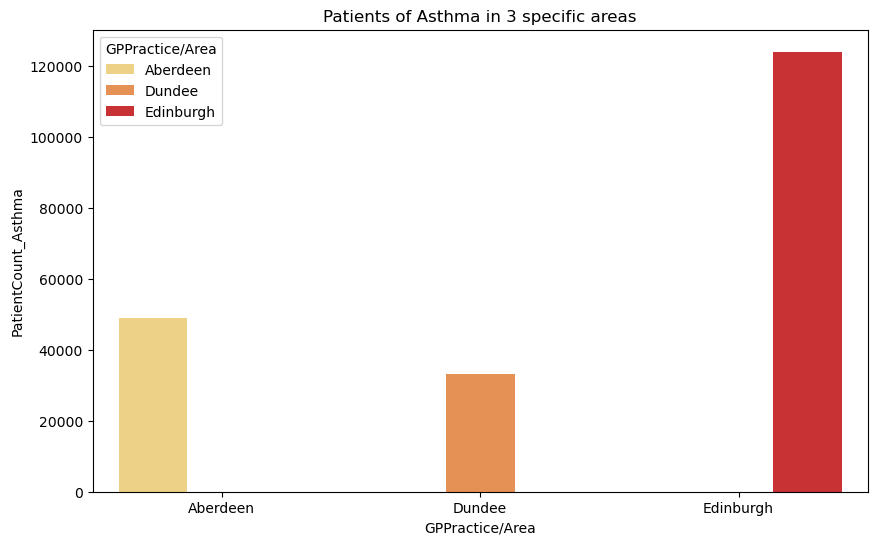

In [10]:
"""
To explore the situation of asthma patients in three cities,
data is first imported, and then the number of patients is counted based on the region.
Finally, plot the total number of patients based on the region
"""

# load data 
asthma_age = pd.read_csv('diseaseprevalence.csv',encoding='utf',usecols=['GPPractice/Area','Year','Age','PatientCount_Asthma'])
# delete the row with 'all'
asthma_age = asthma_age[asthma_age['Age'] != 'All']
# define the age order
age_order = ['00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85plus']
# narrow year to '2019-2022'
asthma_age=asthma_age[asthma_age['Year'] .isin([2019,2020,2021,2022])]

# extract regions containing edinburgh, dundee, aberdeen using regular expressions and rename them all
asthma_age = asthma_age[asthma_age['GPPractice/Area'].str.contains("Edinburgh|Dundee|Aberdeen")]
asthma_age['GPPractice/Area'] = asthma_age['GPPractice/Area'].str.replace('.*Edinburgh.*', 'Edinburgh',  regex=True)
asthma_age['GPPractice/Area'] = asthma_age['GPPractice/Area'].str.replace('.*Aberdeen.*', 'Aberdeen',  regex=True)
asthma_age['GPPractice/Area'] = asthma_age['GPPractice/Area'].str.replace('.*Dundee.*', 'Dundee',  regex=True)
# counting the number of patients by region
city_group = asthma_age.groupby('GPPractice/Area')['PatientCount_Asthma'].sum().reset_index()
# counting the number of patients by age
age_group = asthma_age.groupby(['GPPractice/Area', 'Age'])['PatientCount_Asthma'].sum().reset_index()

# plot according to age groups  with warm color
plt.figure(figsize=(10, 6))
grid = sns.barplot(data=city_group,          
                   x='GPPractice/Area',       # the x-axis
                   y='PatientCount_Asthma',   
                   hue='GPPractice/Area',
                   palette='YlOrRd')

# add title and labels                                     
plt.title('Patients of Asthma in 3 specific areas') 
plt.xlabel('GPPractice/Area')
plt.ylabel('PatientCount_Asthma') 
grid.set_xticks(range(len(city_group['GPPractice/Area'])))

# rotate the  labels so we can read them all
grid.set_xticklabels(city_group['GPPractice/Area'], rotation=0, verticalalignment='top')
plt.show()

This bar chart compares whether there are differences in asthma among three major cities in Scotland. The horizontal axis represents the city, and the vertical axis represents the number of asthma patients. We found that in the four years 2019 to 2022, Edinburgh has the highest number of asthma patients, followed by Aberdeen, and Dundee has the lowest number. Based on the bar chart, it is reasonable to speculate that urban environments could have a substantial impact on the prevalence of asthma. Supporting this hypothesis is the observation that the population size exhibits a consistent trend, with Edinburgh having the highest population, followed by Aberdeen and then Dundee. This observation indicate that demographic factors, which may be related to urbanisation could be influencing the different rates of asthma in these regions.

The following objective is to investigate the age group of asthma patients in each city further after we found that Edinburgh has the higher number of asthma patients. The aim is to find out if the age group that is most affected by asthma is the same in all three cities (Edinburgh, Aberdeen, and Dundee) or if there are different patterns by age group in asthma prevalence in each city.

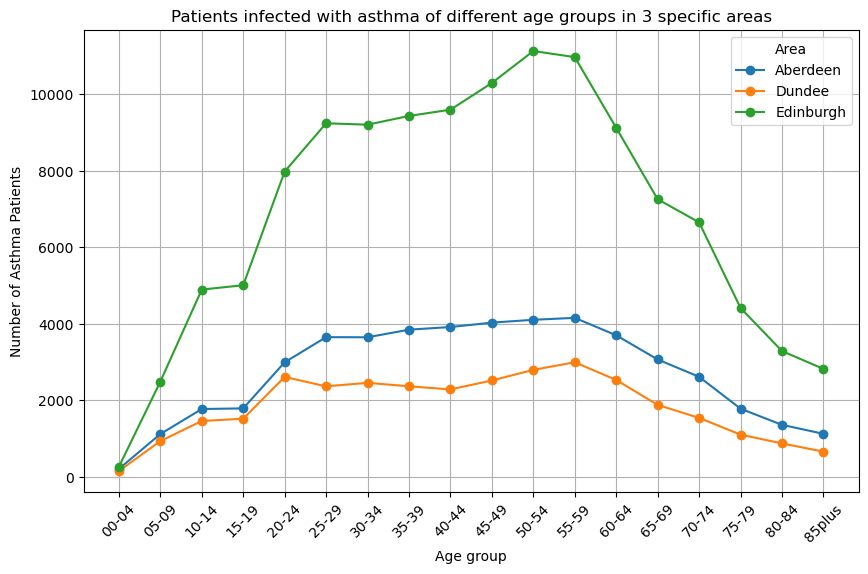

In [11]:
"""
To explore Patients infected with asthma of different age groups in 3 specific areas,
use a loop to plot in each area the number of different age groups
"""
# use a loop to plot in each area the number of different age groups
plt.figure(figsize=(10, 6))
for area in age_group['GPPractice/Area'].unique():         
    plt.plot(age_group[age_group['GPPractice/Area'] ==area ]['Age'],age_group[age_group['GPPractice/Area'] ==area ]['PatientCount_Asthma'], marker='o', label=area)
    
# add labels and title
plt.title('Patients infected with asthma of different age groups in 3 specific areas')
plt.xlabel('Age group')
plt.ylabel('Number of Asthma Patients')
plt.xticks(rotation=45,verticalalignment='top')

# add legend and grids
plt.legend(title='Area')
plt.grid(True)

# show the plot
plt.show()

The above line indicates the relationship between the number of asthma patients in different age groups in the three major cities. The horizontal axis represents the age group of patients, and the vertical axis represents the number of patients. In our observations, we have noticed that the prevalence of asthma differs across cities, but there are commonalities in the age groups affected by this condition. The number of patients in the three major cities of the youth (00-19) and elderly (75-85 plus) is relatively low, and the number of patients increases with age in the youth and decreases with age in the elderly. In all three major cities, there is a significant number of patients between the ages of 50 and 59. It appears that asthma may be influenced by age, suggesting a potential correlation between the two.

After carefully analysing the extensive data of asthma patients in three cities, we concluded that it is necessary to normalise the number of asthma patients based on the total number of patients in three cities. Normalising the data allows for a better understanding, as the disease can be studied more holistically across the three cities. Additionally, this will provide a more comprehensive view of the age groups that are the most disproportionately impacted across Edinburgh, Aberdeen, and Dundee. For a more balanced viewpoint, we also decided to expand the age gap from 5 to 10. As an example, the age groups will be updated to include a broader range, from 00-09, rather than previous breakdown of 00-04 and 05-09. In addition, we will create a new age group of 70+ by combining the age range of 70 to 85 plus.

In [12]:
# change the age group to a wider age range
new_age_range = {'00-04' : '00-09','05-09' : '00-09',
                 '10-14' : '10-19','15-19' : '10-19',
                 '20-24' : '20-29','25-29' : '20-29',
                 '30-34' : '30-39','35-39' : '30-39',
                 '40-44' : '40-49','45-49' : '40-49',
                 '50-54' : '50-59','55-59' : '50-59',
                 '60-64' : '60-69','65-69' : '60-69',
                 '70-74' : '70+','75-79' : '70+',
                 '80-84' : '70+','85plus' : '70+'}
age_group['Age_range'] = age_group['Age'].replace(new_age_range)

# new table with the new age range
new_asthma = age_group.groupby(['GPPractice/Area', 'Age_range'])['PatientCount_Asthma'].sum().reset_index()

# next step: normalisation
# normalisation = number of people in a each age group / total number of patients in 3 regions
# by doing this normalisation, this will help in understanding the distribution of patients

# sum all the asthma patients in 3 regions (from the city_group)
total_asthma = city_group['PatientCount_Asthma'].sum()

# normalise the number of people in each age group by the total patients
new_asthma['Normalized age group (%)'] = (new_asthma['PatientCount_Asthma'] / total_asthma) * 100 

# next step: turn into a stacked bar chart
# plotting stack bar chart for the normalized group (interactive)
bar_chart = px.bar(new_asthma, x='GPPractice/Area', y='Normalized age group (%)',
                   color='Age_range', range_y = [0,65],
                   labels={'Normalized age group (%)' : 'Total Asthma Patients (%)', 'GPPractice/Area' : 'Top 3 Cities'},
                   title = 'Asthma Patients (%) for each age group in the top 3 cities (2019-2022)')

# adjust the y-axis increment by 5
bar_chart.update_layout(yaxis_dtick=5)
bar_chart.show()

The stacked bar chart displays the percentage of patients after normalisation, with each stack representing a different age group. The horizontal axis displays the three cities, while the y-axis represents the percentage of asthma patients. Following the normalisation process, the results align with the previous line chart, indicating that the age group of 50-59 exhibits the highest number of asthma patients in those three cities. Based on the normalised data shown in the stacked bar chart, it is evident that the 50-59 age group in Edinburgh has the highest percentage (10.72%) of asthma patients among the three cities, following by 4.01% in Aberdeen, and 2.81% in Dundee. 

The normalised data reveals a distinct pattern in both Edinburgh and Aberdeen regarding the age groups with the highest asthma patients. Notably, patients age group 50-59 exhibit the highest representation, closely followed by those in the 40-49 and 30-39 age group. Dundee, on the other hand, offers an interesting situation. Although the 50-59 age group is still the highest, it is the 20-29 age group that comes in second place, rather than the 40-49 age group. The 30-39 age group closely follows as well. There appears to be a notable variation in asthma prevalence in Dundee when compared to other cities, indicating potential demographic factors.

To determine which gender has the highest number of asthma patients, it would be efficient to merge the two datasets into a single CSV file. This will save time when reading the file and allow a deeper examination. Therefore, we have created a function that combines two datasets (female and male) while also incorporating the new age range that was mentioned earlier. When considering the input, we carefully select the necessary columns to effectively reach our ultimate objective of determining the gender with the highest number of asthma patients. We will be focusing on the GP Practice or area, year, age, and total asthma patients. 

In [13]:
def combination_csv(female_column, male_column, new_age_range, output_csv=None):
    '''
    This function is to combine 2 csv files (both feamle and male) which the results will be saved as a new csv. 
    By doing this, It will save a lot of time if we use different csv files.
    
    Input:
    - Female_column : columns needed from female dataset
    - Male_column : columns needed from male dataset
    - new_age_range: dictionary of the new age range

    Output:
    - New CSV files 
    '''

    # Read the CSV data for female and male
    female = pd.read_csv('DP Cluster Female.csv', encoding='utf-8', sep=';')
    male = pd.read_csv('DP Cluster Male.csv',encoding='utf-8', sep=';')
    
    # create new variable for each to call specific column in the CSV file
    female_columns = female[female_column]
    male_columns = male[male_column]

    # combined both files into one
    combined_2files = pd.concat([female_columns, male_columns], axis=1)

    # after combining them, we want to remove some unnecessary parts and rename it

    # first: started with the group -> this is to combine both 3 cities
    # search in the GP practice a string contains aberdeen, dundee, edinburgh, then replace them with either Aberdeen, Dundee, or Edinburgh
    filter_cities = combined_2files['GPPractice/Area'].str.contains('Aberdeen|Dundee|Edinburgh')
    combined_2files = combined_2files[filter_cities]
    cities = {'.*Edinburgh.*' : 'Edinburgh','.*Aberdeen.*' : 'Aberdeen','.*Dundee.*' : 'Dundee'}
    combined_2files['GPPractice/Area'] = combined_2files['GPPractice/Area'].replace(cities, regex= True)
    
    # next:  filter the years 2019, 2020, 2021, 2022
    combined_2files = combined_2files[combined_2files['Year'].isin([2019,2020,2021,2022])]

    # next: remove the age with 'All' and replace the rest with the age dictionary 
    combined_2files = combined_2files[combined_2files['Age'] != 'All']
    combined_2files['Age'] = combined_2files['Age'].replace(new_age_range)
    
    # next: sum the total patients for each age group
    combined_2files = combined_2files.groupby(['GPPractice/Area', 'Age'])['PatientCount_Asthma'].sum().reset_index()
    
    # next: to avoid the misunderstanding as theres 2 same columns name, change the header of each column to a specified gender
    combined_2files.columns.values[2] = 'Female Asthma Patients'
    combined_2files.columns.values[3] = 'Male Asthma Patients'

    # next: save to csv
    if output_csv:
        combined_2files.to_csv(output_csv, index=False)

    return combined_2files

# combine both gender, year 2019-2022, in those 3 cities
female_column = ['GPPractice/Area', 'Year', 'Age', 'PatientCount_Asthma']
male_column = ['PatientCount_Asthma']

# save the final csv as 'gender_asthma'
gender_asthma = combination_csv (female_column, male_column, new_age_range, output_csv='gender_asthma.csv')

In order to understand the disease in more depth, it is imperative to look at the prevalence of asthma in all registered patients at NHS in Edinburgh, Aberdeen and Dundee separately. To achieve this, we compared the total asthma patients to the total registered patients and divided the figures to come up with the percentage of patients affected by asthma out of all the registered patients in the city. 

Two dataframes were merged for this analysis: 

1) demographics_2023_q1: This file contains the demographic (age, gender) data for all registered patients in Scotland and divides it amongst the different cities and clusters. 
2) diseaseprevalence.csv: This file contains data for all reported diseases in Scotland.



The pie chart below represents the percentage of asthma patients in the three cities. Each slice represents the absolute percentage for each city, and the pie chart as a whole demonstrates a relative comparison across the cities. 

In [14]:
# Read the sheet 'Age-Gender' from the demographics excel file
total_patients = pd.read_excel("https://publichealthscotland.scot/media/22255/demographics_2023_q1.xlsx", sheet_name = "Age-Gender")
asthma_patients = pd.read_csv('diseaseprevalence.csv',encoding='utf',usecols=['GPPractice/Area','PatientCount_Asthma'])

In [15]:
# select the clusters from the cities Aberdeen, Dundee and Edinburgh
filter_cities = total_patients['Cluster'].str.contains('Aberdeen|Dundee|Edinburgh')
# set missing values to false
filter_cities[filter_cities.isna()] = False
# filter the file based on only the data for the three cities 
total_patients = total_patients[filter_cities]
# change the names of the different clusters to the name of the city using pattern matching and store it in a dictionary
cities = {'.*Edinburgh.*' : 'Edinburgh','.*Aberdeen.*' : 'Aberdeen','.*Dundee.*' : 'Dundee'}
# replace the cluster names with city names
total_patients['Cluster'] = total_patients['Cluster'].replace(cities, regex= True)

# select Q3 quarters
filter_quarter = total_patients['Quarter'].str.contains('Q3')
# set missing values to false
filter_quarter[filter_quarter.isna()] = False
# remove values for 2018
total_patients = total_patients[total_patients['Quarter'] != '2018/19 (Q3) Oct - Dec']
# filter the file based on only the data for the three quarters in Edinburgh, Dundee and Aberdeen
total_patients = total_patients[filter_quarter]
# change the names of the quarters to Q3 (respective year) using pattern matching and store it in a dictionary
quarters = {'2019/20 (Q3) Oct - Dec' : 'Q3 2019', '2020/21 (Q3)Oct - Dec' : '  Q3 2020', '2021/22 (Q3)Oct - Dec' : 'Q3 2021', '2022/23 (Q3) Oct - Dec' : 'Q3 2022' }
# replace the quarter names
total_patients['Quarter'] = total_patients['Quarter'].replace(quarters, regex = True)
# sum the total number of patients in the three cities inidividually 
patient_by_city = total_patients.groupby(['Cluster'])['Total Patients'].sum().reset_index()
# sum the total number asthma patients in the three cities individually
city_group = asthma_age.groupby('GPPractice/Area')['PatientCount_Asthma'].sum().reset_index()

# merge patient by city and city_group to determine total registered patients and total registered asthma patients in the city
normalised_asthma_patients = pd.merge(patient_by_city, city_group, left_on='Cluster', right_on='GPPractice/Area')

# normalise the number of asthma patients by the total registered patients in the three cities
normalised_asthma_patients['Normalized Asthma Patients (%)'] = (normalised_asthma_patients['PatientCount_Asthma'] / normalised_asthma_patients['Total Patients']) * 100
# pie chart representing the normalised patients by city and comparing the number across the three cities
fig = px.pie(normalised_asthma_patients, values='Normalized Asthma Patients (%)', names='Cluster', title='Prevalence of Asthma in Total Registered Patients')
fig.show()


/tmp/ipykernel_1044/3075989796.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.





Edinburgh has the highest number of asthma patients compared to the total registered patients. This can be attributed to the size of the city, as Edinburgh has the highest population out of the three cities [1]. Higher levels of AQI (Air Quality Index) can be seen as a cause of alleviating asthma symptoms [4], however, Aberdeen has the highest AQI compared to  Edinburgh and Dundee [5]. It should be noted that Aberdeen has the lowest number of asthma patients out of total registered patients. 

Thus, it can be concluded that size of population is the major factor contributing to the increase in the number of patients. 


Next, we analyzed the gender breakdown for the disease. According to Asthma and Allergy Foundation of America, asthma is more common in adult females compared to males [6]. This is attributed to female sex hormones, that lead to poor asthma control [7]. We decided to test this statistic in Edinburgh, Aberdeen and Dundee in Scotland. 

The number of female/male asthma patients was normalized against the total registered patients to standardize the figures. Additionally, the genders were analyzed separately to compare the figures across the three cities. 

The first pie chart represents the percentage of female asthma patients in the three cities while the second one represents the figures for the male population. Each slice represents the absolute percentage for each city, and the pie chart as a whole demonstrates a relative comparison across the cities. 

In [16]:
# merge patient by city and gender asthma to determine total registered patients and compare it to the genders of the asthma patients
normalised_gender = pd.merge(patient_by_city, gender_asthma, left_on='Cluster', right_on='GPPractice/Area')
# normalise the number of female asthma patients by the total registered patients in the three cities
normalised_gender['Normalized Female Asthma Patients (%)'] = (normalised_gender['Female Asthma Patients'] / normalised_gender['Total Patients']) * 100
# pie chart representing the normalised female patients by city and comparing the number across the three cities
fig = px.pie(normalised_gender, values='Normalized Female Asthma Patients (%)', names='Cluster', title='Prevalence of Asthma in Total Female Registered Patients')
fig.show()

# normalise the number of male asthma patients by the total registered patients in the three cities
normalised_gender['Normalized Male Asthma Patients (%)'] = (normalised_gender['Male Asthma Patients'] / normalised_gender['Total Patients']) * 100
# pie chart representing the normalised male patients by city and comparing the number across the three cities
fig = px.pie(normalised_gender, values='Normalized Male Asthma Patients (%)', names='Cluster', title='Prevalence of Asthma in Total Male Registered Patients')
fig.show()

Asthma is more common in women compared to males as the number of asthma patients is greater across all the three cities. The breakdown of gender across the three cities matches the overall prevalence of the disease with Edinburgh having the highest number of both male and female asthma patients. 


After a thorough examination of the disease, we concluded that the typical asthma patient profile consists of a female within the age range of 50-59. These patients can be found more commonly in Edinburgh compared to Aberdeen or Dundee due to the size of the population. This patient profile can be used by pharmaceutical companies for choosing participants in clinical trials for medicines and treatments being developed for asthma. Moreover, further research can be conducted to determine the cause of increased occurrence in the identified patient profile.

This reports provides scope for future research on the cause of asthma and its linkage with different factors such as AQI and population density. The spread of respiratory viral infections is increased in more densely populated areas, which can alleviate the symptoms of asthma considerably [8]. Thus, this can be studied in more detail to determine strategies to reduce the spread of respiratory diseases and provide relief to the patients suffering from the chronic disease. 

Reference List
- [1] [Scotland's Cities](https://www.scotland.org/about-scotland/scotlands-cities)
- [2] [Respiratory Complications after COVID-19](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8907756/)
- [3] [Plotly Libraries](https://plotly.com/python/)
- [4] [Air Pollution and Asthma](https://www.aaaai.org/tools-for-the-public/conditions-library/asthma/your-questions-answered-on-air-pollution-and-asthm#%253A~%253Atext%253DAir%2520pollution%2520is%2520made%2520up%252Cabove%2520101%2520is%2520considered%2520dangerous.)
- [5] [Air Quality Index by City](https://www.iqair.com/gb/)
- [6] [Asthma and Allergy Foundation of America](https://aafa.org/asthma/asthma-facts/#%253A~%253Atext%253DAsthma%2520is%2520more%2520common%2520in%252Cto%25206.5%2525%2520of%2520male%2520adults.%2526text%253DIt%2520is%2520a%2520leading%2520chronic%2520disease%2520in%2520children.%2526text%253DCurrently%252C%2520there%2520are%2520about%25204.5%252Cage%2520of%252018%2520with%2520asthma.)
- [7] [The Journal of Allergy and Clinical Immunology: In Practice](https://www.jaci-inpractice.org/article/S2213-2198%252822%252900124-6/fulltext#%253A~%253Atext%253DThe%2520physiologic%2520development%2520of%2520the%252Cassociated%2520with%2520poor%2520asthma%2520control.)
- [8] [ASTHMA + LUNG UK](https://www.asthmaandlung.org.uk/conditions/asthma/asthma-triggers/colds-flu#%253A~%253Atext%253DColds%2520and%2520flu%2520are%2520the%252Cthat%2520could%2520be%2520life-threatening.)
